# DIABETES

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [156]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
col_names=["Number of times pregnant", "Plasma glucose concentration", "Diastolic blood pressure (mm Hg)", 
           "Triceps skin fold thickness (mm)", "2-Hour serum insulin (mu U/ml)", 
           "Body mass index (weight in kg/(height in m)^2)",
           "Diabetes pedigree function", "Age (years)", "Class variable (0 or 1)"]
DATA=pd.read_csv(url, names=col_names)
X=DATA.iloc[:,:8]
Y=DATA.iloc[:,8]

In [157]:
DATA.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


We see that our data is balanced, because we have 500 samples of class "0" and 268 samples of class "1". 

0    500
1    268
Name: Class variable (0 or 1), dtype: int64


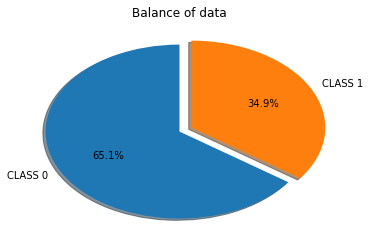

In [158]:
print(DATA["Class variable (0 or 1)"].value_counts())

#DATA["Class variable (0 or 1)"].count(1)
plt.pie([500, 268], 
        labels=["CLASS 0", "CLASS 1"], 
        startangle=90, 
        shadow=True, 
        explode=(0,0.1),
        autopct='%1.1f%%')
plt.title('Balance of data')

We see a wide amount of missing data in several columns. It's evidentiary that we cannot have any 0 for Diastolic blood pressure, Triceps skin fold thickness, 2-Hour serum insulin, Body mass index. Due to the number of 0, we cannot simply drop them, as we could lose a lot of valuable information. We will resort to mean imputation.  

In [159]:
from sklearn.preprocessing import Imputer
IMP=Imputer(missing_values=0, strategy="mean", axis=0)
IMP=IMP.fit(X)
DATA_imputed=IMP.transform(X)

In [160]:
DATA=pd.DataFrame(DATA_imputed, 
                  columns=["Number of times pregnant", 
                           "Plasma glucose concentration", 
                            "Diastolic blood pressure (mm Hg)", "Triceps skin fold thickness (mm)", 
                           "2-Hour serum insulin (mu U/ml)", 
                         "Body mass index (weight in kg/(height in m)^2)", "Diabetes pedigree function", "Age (years)"] )
DATA

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
0,6.000000,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50.0
1,1.000000,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31.0
2,8.000000,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32.0
3,1.000000,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21.0
4,4.494673,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33.0
5,5.000000,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30.0
6,3.000000,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26.0
7,10.000000,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29.0
8,2.000000,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53.0
9,8.000000,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54.0


In [161]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
Number of times pregnant                          768 non-null float64
Plasma glucose concentration                      768 non-null float64
Diastolic blood pressure (mm Hg)                  768 non-null float64
Triceps skin fold thickness (mm)                  768 non-null float64
2-Hour serum insulin (mu U/ml)                    768 non-null float64
Body mass index (weight in kg/(height in m)^2)    768 non-null float64
Diabetes pedigree function                        768 non-null float64
Age (years)                                       768 non-null float64
dtypes: float64(8)
memory usage: 48.1 KB


We see that memory usage addsup to 48.1 KB. We could reduce this number substituting float for integers where it's possible.

In [162]:
col_to_int=["Number of times pregnant", "Plasma glucose concentration",
           "Diastolic blood pressure (mm Hg)", "Triceps skin fold thickness (mm)", "2-Hour serum insulin (mu U/ml)", "Age (years)"]
DATA[col_to_int]=DATA[col_to_int].astype(int)

In [163]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
Number of times pregnant                          768 non-null int32
Plasma glucose concentration                      768 non-null int32
Diastolic blood pressure (mm Hg)                  768 non-null int32
Triceps skin fold thickness (mm)                  768 non-null int32
2-Hour serum insulin (mu U/ml)                    768 non-null int32
Body mass index (weight in kg/(height in m)^2)    768 non-null float64
Diabetes pedigree function                        768 non-null float64
Age (years)                                       768 non-null int32
dtypes: float64(2), int32(6)
memory usage: 30.1 KB


Let's check our data for multicollinearity. Multicollinearity can cause detrimental effect to our classifier. 
Fortunately we don't have any significant correlation between our features. 

In [164]:
DATA.corr()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
Number of times pregnant,1.000000,0.153070,0.255967,0.126082,0.066832,0.100934,-0.009198,0.522303
Plasma glucose concentration,0.153070,1.000000,0.218615,0.192677,0.420301,0.230932,0.137100,0.266591
Diastolic blood pressure (mm Hg),0.255967,0.218615,1.000000,0.191892,0.072041,0.281319,-0.002378,0.324915
Triceps skin fold thickness (mm),0.126082,0.192677,0.191892,1.000000,0.158133,0.543162,0.102188,0.126107
2-Hour serum insulin (mu U/ml),0.066832,0.420301,0.072041,0.158133,1.000000,0.166881,0.099170,0.136050
Body mass index (weight in kg/(height in m)^2),0.100934,0.230932,0.281319,0.543162,0.166881,1.000000,0.153400,0.025519
Diabetes pedigree function,-0.009198,0.137100,-0.002378,0.102188,0.099170,0.153400,1.000000,0.033561
Age (years),0.522303,0.266591,0.324915,0.126107,0.136050,0.025519,0.033561,1.000000


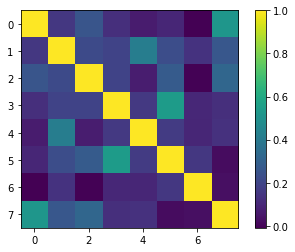

In [165]:
plt.imshow(DATA.corr(), cmap="viridis")
plt.colorbar()

Now checking for any NaN-values

In [166]:
DATA.isnull().values.any()

False

ALGORITHM SELECTION

What algorithm performs better? We will use different metrics.

In [167]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score

In [168]:
models=[LogisticRegression, KNeighborsClassifier, SVC, DecisionTreeClassifier, RandomForestClassifier, 
       AdaBoostClassifier, GaussianNB]
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.4)

In [169]:
metrics={}
scores=["accuracy", "f1_weighted", "precision_weighted", "recall_weighted"]

for model in models:
    classifier=model().fit(X_train, Y_train)
    name=str(classifier).rsplit('(', 1)[0]
    metrics[name]=[]
    for i in scores:
        score=np.average(cross_val_score(classifier, X_test, Y_test, scoring=i))
        metrics[name].append(score)
    
    print("Model: ", name, 
          "; Accuracy: ", round(metrics[name][0],2),
          "; F1: ", round(metrics[name][1], 2),
          "; Precision: ", round(metrics[name][2], 2),
          "; Recall: ", round(metrics[name][3], 2))

Model:  LogisticRegression ; Accuracy:  0.73 ; F1:  0.71 ; Precision:  0.72 ; Recall:  0.73
Model:  KNeighborsClassifier ; Accuracy:  0.69 ; F1:  0.68 ; Precision:  0.68 ; Recall:  0.69


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\metrics\clas

Model:  SVC ; Accuracy:  0.65 ; F1:  0.51 ; Precision:  0.42 ; Recall:  0.65
Model:  DecisionTreeClassifier ; Accuracy:  0.67 ; F1:  0.66 ; Precision:  0.63 ; Recall:  0.66
Model:  RandomForestClassifier ; Accuracy:  0.7 ; F1:  0.7 ; Precision:  0.7 ; Recall:  0.7
Model:  AdaBoostClassifier ; Accuracy:  0.7 ; F1:  0.7 ; Precision:  0.71 ; Recall:  0.7
Model:  GaussianNB ; Accuracy:  0.72 ; F1:  0.72 ; Precision:  0.72 ; Recall:  0.72


Let's compare how the algorithms behave before and after standardization

In [170]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [171]:
X_train, X_test, Y_train, Y_test=train_test_split(X_scaled, Y)

metrics_scaled={}
for model in models:
    classifier=model().fit(X_train, Y_train)
    name=str(classifier).rsplit('(', 1)[0]
    metrics_scaled[name]=[]
    for i in scores:
        score=np.average(cross_val_score(classifier, X_test, Y_test, scoring=i))
        metrics_scaled[name].append(score)

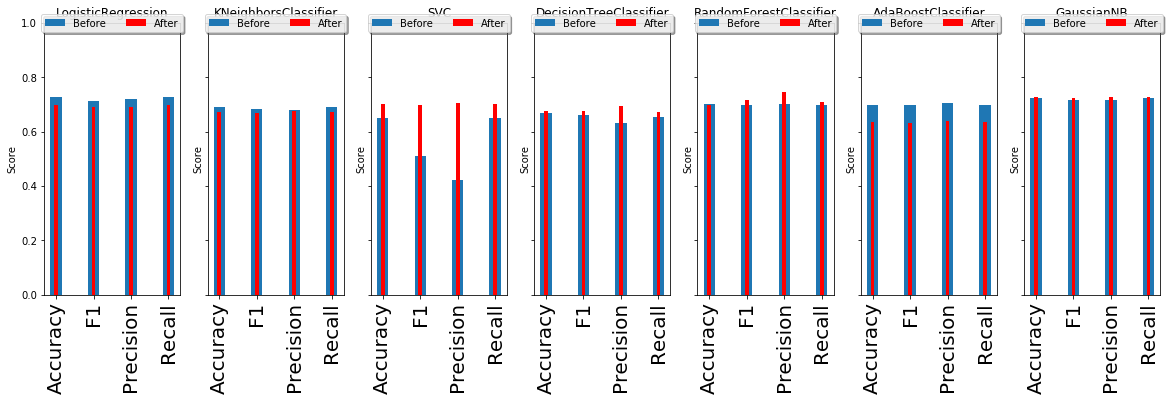

In [172]:
fig, axes = plt.subplots(1, 7, sharey=True)
fig.set_size_inches(20, 5)

k=0

for i in axes: 
    i.set_xticklabels(labels=["Accuracy", "F1", "Precision", "Recall"],rotation='vertical', fontsize=20)
    i.bar([0,1,2,3], metrics[list(metrics.keys())[k]], width=0.3, label="Before")
    i.bar([0,1,2,3], metrics_scaled[list(metrics_scaled.keys())[k]], color="red", width=0.1, label="After")
    i.set_title(list(metrics.keys())[k])
    k+=1
    i.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True)  
    plt.setp(axes, xticks=[0,1,2,3], xticklabels= ["Accuracy", "F1", "Precision", "Recall"] )
    plt.ylim(0,1)
    i.set_ylabel('Score')
  

Explanation of our results





Logistic Regression and KNeighborsClassifier slightly improved their performance.

DecisionTreeClassifier, RandomForestClassifier are left without significant changes, because tree classifiers don't need normalization

AdaBoostClassifier and GaussianNB didn't change significantly. 

SVC improved prominently, as SVC works well only with normalized data. 

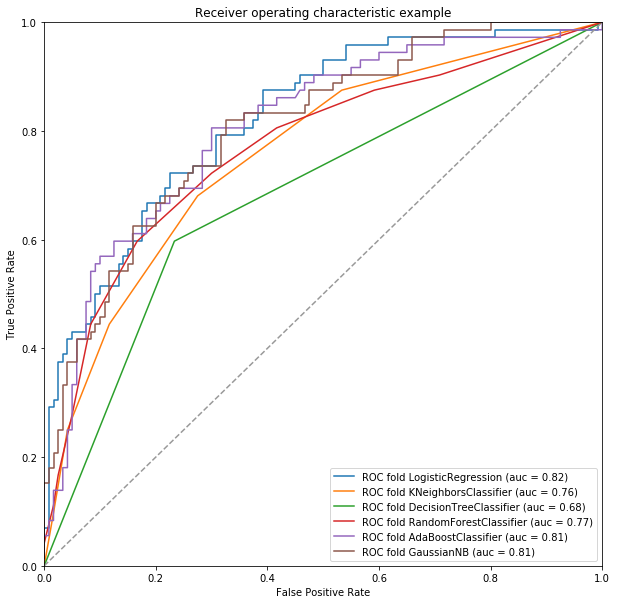

In [173]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
models=[LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, 
       AdaBoostClassifier, GaussianNB]
plt.figure(figsize=(10, 10)) 

for model in models:
    classifier=model().fit(X_train, Y_train)
    pred_scr = classifier.predict_proba(X_test)[:, 1]
    FPR, TPR, thresholds = roc_curve(Y_test, pred_scr )
    roc_auc = auc(FPR, TPR)
    name=str(classifier).rsplit('(', 1)[0]
    plt.plot(FPR, TPR, label='ROC fold %s (auc = %0.2f)' % (name, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")


We will proceed with LogisticRegression. 
We have to find out, whether there is a chance to improve performance of this model. 

Validation curves

In [174]:
from sklearn.learning_curve import validation_curve


VALIDATION CURVES

Param: C
Training score:
 0.78

Param: C
Validation score:
 0.77


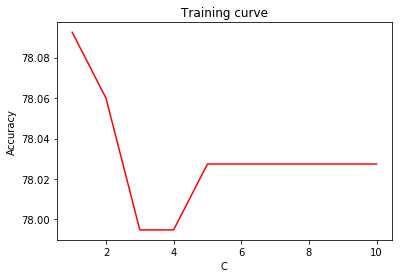

In [175]:
model=LogisticRegression()
parameter_grid=np.linspace(1,10,40).astype(int)
train_scores, validation_scores = validation_curve(model, X_scaled, Y, "C", parameter_grid, cv=5) 
print("\nVALIDATION CURVES")
print("\nParam: C\nTraining score:\n", round(np.average(train_scores), 2))
print("\nParam: C\nValidation score:\n", round(np.average(validation_scores),2))

# Plot the curve 
plt.figure() 
plt.plot(parameter_grid, 100*np.average(train_scores, axis=1), color='red') 
plt.title('Training curve') 
plt.xlabel('C') 
plt.ylabel('Accuracy') 

Explanation of results
The graph shows us that the optimal paramater C adds up to 2

LEARNING CURVE


Learning CURVES

Training scores:
 0.76

Validation scores:
 0.77


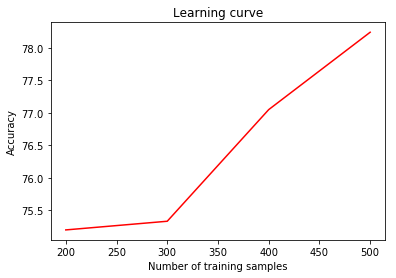

In [176]:
from sklearn.learning_curve import learning_curve
model = LogisticRegression(random_state=7)
parameter_grid = np.array([200, 300, 400, 500]) 
train_sizes, train_scores, test_scores = learning_curve(model, X_scaled, Y, train_sizes=parameter_grid, cv=5) 
print("\nLearning CURVES")
print("\nTraining scores:\n", round(np.average(train_scores), 2))
print("\nValidation scores:\n", round(np.average(validation_scores), 2))
plt.figure() 

plt.plot(parameter_grid, 100*np.average(train_scores, axis=1), color='red') 
plt.title('Learning curve') 
plt.xlabel('Number of training samples') 
plt.ylabel('Accuracy') 
plt.show()


Explanation of results
What we see in the graph, is the more data we have, the better is performance. 

In [177]:
classifier=LogisticRegression().fit(X_train, Y_train)
classifier.coef_


array([[ 0.33382795,  1.14825274, -0.25678602,  0.01465997, -0.24631699,
         0.71780376,  0.35061242,  0.16996291]])